In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("hw04_data_set.csv").values
X_train,X_test = dataset[:100,0],dataset[100:,0]
Y_train,Y_test = dataset[:100,1],dataset[100:,1]

In [3]:
# REGRESSOGRAM ---> Origin=0, Bin_width=3

bin_width = 3
origin = 0
max_value = 60
left_bounds = np.arange(origin,max_value,bin_width)
right_bounds = np.arange(origin+bin_width,max_value+bin_width,bin_width)

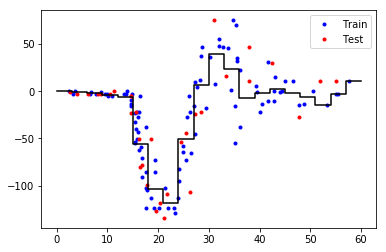

In [4]:
def compute_g_hat():
    g_hat = []
    for b in range(len(left_bounds)):
        n = (Y_train*(left_bounds[b] < X_train)*(X_train <= right_bounds[b])).sum()
        d = ((left_bounds[b] < X_train)*(X_train <= right_bounds[b])).sum()
        
        g_hat.append(n/d)
    
    return g_hat

g_hat = compute_g_hat()

x_t = []
y_t = []
for b in range(len(left_bounds)):
    x_t.append(left_bounds[b])
    x_t.append(right_bounds[b])
    y_t.append(g_hat[b])
    y_t.append(g_hat[b])
    
plt.plot(X_train,Y_train,".",color="blue",label="Train")
plt.plot(X_test,Y_test,'.',color="red",label="Test")
plt.plot(x_t,y_t,'-',color="black")
plt.legend()
plt.savefig("regressogram.png")

In [5]:
Y_test_hat = np.zeros((len(Y_test)))
for i in range(len(Y_test)):
    for j in range(len(left_bounds)):
        if (left_bounds[j] < X_test[i]) and X_test[i] <= right_bounds[j]:
            Y_test_hat[i] = g_hat[j]

RMSE = ((((Y_test_hat - Y_test)**2).sum())/len(Y_test))**0.5
print(RMSE)

24.725997719599924


In [6]:
# RUNNING MEAN SMOOTHER
min_value = 0
max_value = 60
bin_width = 3
data_interval = np.arange(min_value+bin_width/2,max_value+0.01-bin_width/2,0.01)


In [7]:
def compute_g2_hat(data_interval):
    g2_hat = []
    for i in data_interval:
        n = (Y_train*((i-0.5*bin_width) < X_train)*(X_train <= i+0.5*bin_width)).sum()
        d = (((i-0.5*bin_width) < X_train)*(X_train <= i+0.5*bin_width)).sum()

        g2_hat.append(n/d)
        
    return g2_hat

g2_hat = compute_g2_hat(data_interval)

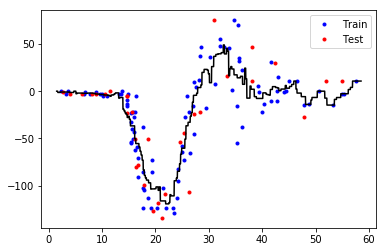

In [8]:
plt.plot(X_train,Y_train,".",color="blue",label="Train")
plt.plot(X_test,Y_test,".",color="red",label="Test")
plt.plot(data_interval,g2_hat,color="black")
plt.legend()
plt.savefig("running_mean_smoother.png")

In [9]:
def compute_Y_test_hat():
    Y_test_hat = []
    for i in X_test:
        n = (Y_train*((i-0.5*bin_width) < X_train)*(X_train <= i+0.5*bin_width)).sum()
        d = (((i-0.5*bin_width) < X_train)*(X_train <= i+0.5*bin_width)).sum()
        Y_test_hat.append(n/d)
    return Y_test_hat

In [10]:
Y_test_hat = compute_Y_test_hat()
RMSE = ((((Y_test_hat - Y_test)**2).sum())/len(Y_test))**0.5
print(RMSE)

23.840322905172517


In [11]:
# KERNEL SMOOTHER
min_value = 0
max_value = 60
bin_width = 1
data_interval = np.arange(min_value+bin_width/2,max_value+0.01-bin_width/2,0.01)



In [12]:
def compute_g3_hat(data_interval):
    g3_hat = []
    for i in data_interval:
        n = (Y_train*(1/np.sqrt(2*np.pi))*np.exp(-0.5*((i-X_train)**2)/(bin_width**2))).sum()
        d = ((1/np.sqrt(2*np.pi))*np.exp(-0.5*((i-X_train)**2)/(bin_width**2))).sum()
        g3_hat.append(n/d)
    return g3_hat
g3_hat = compute_g3_hat(data_interval)

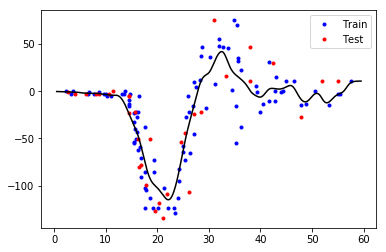

In [13]:
plt.plot(X_train,Y_train,".",color="blue",label="Train")
plt.plot(X_test,Y_test,".",color="red",label="Test")
plt.plot(data_interval,g3_hat,color="black")
plt.legend()
plt.savefig("kernel_smoother.png")

In [14]:
def compute_Y_test_hat():
    Y_test_hat = []
    for i in X_test:
        n = (Y_train*(1/np.sqrt(2*np.pi))*np.exp(-0.5*((i-X_train)**2)/(bin_width**2))).sum()
        d = ((1/np.sqrt(2*np.pi))*np.exp(-0.5*((i-X_train)**2)/(bin_width**2))).sum()
        Y_test_hat.append(n/d)
    return Y_test_hat

In [15]:
Y_test_hat = compute_Y_test_hat()
RMSE = ((((Y_test_hat - Y_test)**2).sum())/len(Y_test))**0.5
print(RMSE)

24.16724626646939
